In [1]:
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation as R

from alr_sim.sims.SimFactory import SimRepository
from alr_sim.sims.universal_sim.PrimitiveObjects import Box
from alr_sim.core import Scene
from alr_sim.sims.mj_beta import MjCamera

Exception: 
Missing path to your environment variable. 
Current values LD_LIBRARY_PATH=
Please add following line to .bashrc:
export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/i53/student/m_hesche/.mujoco/mujoco210/bin

In [ ]:
box1 = Box(
    name="box1",
    init_pos=[0.5, -0.2, 0.0],
    init_quat=[0, 1, 0, 0],
    rgba=[0.1, 0.25, 0.3, 1],
)
object_list = [box1]

# Generate the chosen Scene and Agent
sim_factory = SimRepository.get_factory("mj_beta")
scene = sim_factory.create_scene(
    object_list=object_list, dt=0.0002, render=Scene.RenderMode.BLIND
)
agent = sim_factory.create_robot(scene, dt=0.0002)

cam = MjCamera(
    "my_cam",
    init_pos=(1.2, 0, 1),
    init_quat=R.from_euler("zyx", (90, 50, 0), degrees=True)
    .as_quat()[[3, 0, 1, 2]]
    .tolist(),
)
scene.add_object(cam)
# cam.set_cam_params(height=cam_height, width=cam_width)

# start simulation
scene.start()

agent.wait(1)
# # go to start position
# agent.gotoCartPositionAndQuat(robot_pos, robot_quat, duration=move_duration)


In [ ]:
# get camera data
rgb_img, depth_img_denormalized = cam.get_image(denormalize_depth=True) # default
rgb_img, depth_img_normalized = cam.get_image(denormalize_depth=False)

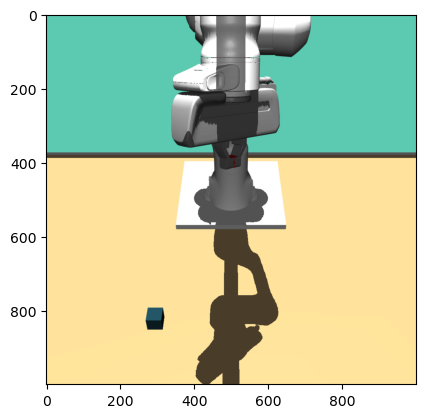

In [ ]:
plt.imshow(rgb_img)